In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



## A "mystery" function

In [123]:
# Of course, it is trivial to find the function's formula, but leave it a mystery for now.
from part2 import f

Now we can find the function's values at any particular value we like. 

In [90]:
# try any values you like here. 
f(1,1)

2.3195919791379005

Lets graph it on the interval $[0,2]\times [0,2]$. 

The `vmin` and `vmax` values here are optional, but are being set for reasons explained below.

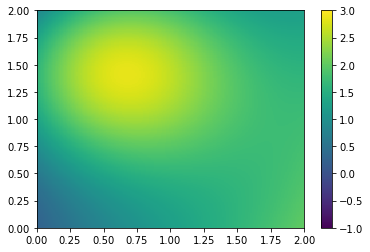

In [91]:
x = np.linspace(0,2,201)
y = x
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.pcolormesh(X,Y,Z,vmin=-1,vmax=3)
plt.colorbar();

Now let's visualize the "northeast" rule from [Part 1](Riemann1.ipynb) of this lab. 

One way to interpret this is that we are replacing the function $f$ with a 'simple' function which has a comstant value on each subrectangle of the grid. 

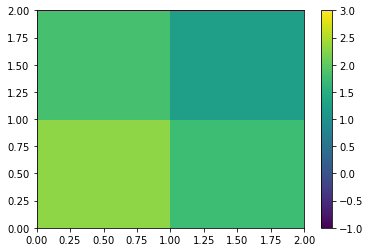

In [93]:
# start with a simple 2-by-2 partition. 
x = np.linspace(0,2,3)
y = x
X,Y = np.meshgrid(x,y)
Z = np.array([[f(1,1),f(2,1)],[f(1,2),f(2,2)]])
plt.pcolormesh(X,Y,Z,vmin=-1,vmax=3)
plt.colorbar();

In the interactive below, `n` is the size of the partitions in each direction and the dots show where the function was sampled. To understand what is going on, try moving the the sliders back and forth for each schema.

In [127]:
@interact
def _(n=(2,38,2),scheme=['ne','mid','rand']):
    x = np.linspace(0,2,n+1)
    y = x
    X,Y = np.meshgrid(x,y) 
    if scheme == 'mid':
        offset = 1/2 * 2/n
    elif scheme == 'rand':
        offset = np.random.rand(*X.shape) * 2/n
    else:
        offset = 2/n
    Z = f(X + offset,Y + offset)
    plt.pcolormesh(X,Y,Z,vmin=-1,vmax=3),
    plt.colorbar();
    plt.scatter(X + offset,Y + offset,s=5)
    plt.xlim([0,2])
    plt.ylim([0,2])


interactive(children=(IntSlider(value=20, description='n', max=38, min=2, step=2), Dropdown(description='schem…

## Partial Data

We have a lot of choice for approximating integrals with Riemann sums when we have access to all values of the integrand, but often in the real world our values come from a finite set of measurements. 

What happens when we have access to only some of a function's data? What can be said about its integral.

Let's start with a simulation of this situation. We will keep our $[0,2]\times[0,2]$ region of integration and select 200 random points. 

In [264]:
np.random.seed(1066)
pts = .45*np.random.randn(200,2) % 2
data = pd.DataFrame(pts,columns=['x','y'])
data['z'] = f(data.x,data.y)
data.head()

,x,y,z
0,0.408426,1.123888,2.429003
1,1.931872,1.078731,1.715826
2,0.481144,0.045745,0.820094
3,0.102298,0.097671,0.411871
4,1.535922,1.465971,1.827555


`data` is now a "dataframe", or more specifically, a `pandas` dataframe. [Pandas](https://pandas.pydata.org/) is a powerful data analysis library whose capabilities we'll only touch on. On one level, the dataframe is just a table with rows an columns. In our example, each row represents a point, and each the three columns are the $x$-, $y$-, and $z$-coordinates of the point. 

You can access a column by indexing (like an array) but with the column name.

In [214]:
data['z']

0      2.332981
1      1.736046
2      0.876084
3      0.432151
4      1.909592
5      1.228654
6      1.873808
7      0.711527
8      1.834883
9      1.495053
10     1.738719
11     1.718416
12     1.539229
13     2.466479
14     1.835388
15     1.803530
16     1.847323
17     2.742869
18     1.771257
19     2.120397
20     2.167877
21     1.763767
22     1.705584
23     1.860397
24     2.360872
25     1.784541
26     1.185049
27     1.335372
28     1.131816
29     1.470829
         ...   
220    1.568512
221    1.594824
222    1.695347
223    1.594745
224    1.684229
225    1.588554
226    1.814181
227    1.987120
228    1.162655
229    0.425175
230    1.663917
231    1.544503
232    2.187979
233    0.569004
234    0.639673
235    2.024385
236    1.285087
237    1.703514
238    1.858173
239    1.626307
240    0.467248
241    1.687119
242    1.302767
243    2.088967
244    1.787018
245    2.199699
246    2.740680
247    2.352219
248    1.439772
249    1.885160
Name: z, Length: 250, dt

There is a shortcut when, as here, the column names are simple (no spaces/weird characters) strings.

In [140]:
data.y is data['y']

True

You can reference a row by using the `.loc` attribute.

In [237]:
data.loc[3]

x    0.102298
y    0.097671
z    0.411871
Name: 3, dtype: float64

Let's display these. Note the color assignment.

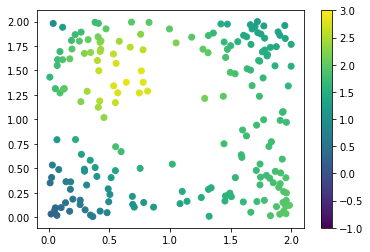

In [238]:
plt.scatter(data.x,data.y,c=data.z,vmin=-1,vmax=3)
plt.colorbar();

We can see some features of the underlying function, but we are clearly missing data. 

Wha can we say about $$\iint_\mathcal{R} f\, dA$$ where $\mathcal{R} = [0,2]\times[0,2]$?

Let's construct a simple Riemann sum. We partition down the middle in each direction to make 4 subrectangles.

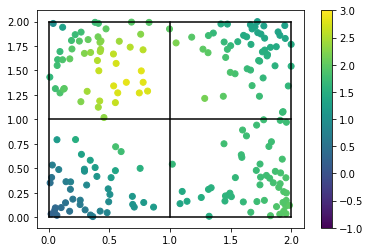

In [242]:
plt.scatter(data.x,data.y,c=data.z,vmin=-1,vmax=3)
for c in [0,1,2]:
    plt.plot([c,c],[0,2],'k')
    plt.plot([0,2],[c,c],'k')
plt.colorbar();

To get a Riemann sum estimate, we simply multiply the area of each subrectangle $\Delta A = 1$ times a value of the function inside. That’s he only problem is choosing a value as we seem to have plenty. 

In fact, let's see all the data in the top-left corner. This is where pandas pays off.

In [243]:
data[(data.x < 1) & (data.y > 1)]

,x,y,z
0,0.408426,1.123888,2.429003
8,0.092716,1.270124,1.868286
13,0.420215,1.187639,2.530247
14,0.069369,1.550623,1.779887
15,0.072984,1.610240,1.737613
17,0.778152,1.378685,2.824890
18,0.092487,1.693181,1.693787
20,0.455128,1.018623,2.320526
24,0.430678,1.802073,2.254889
36,0.217998,1.865899,1.708530


In [244]:
len(data[(data.x < 1) & (data.y > 1)])

52

So what is happening here? 

Let's look first at the sub-expression `data.x < 1`.

In [220]:
data.x < 1

0       True
1      False
2       True
3       True
4      False
5       True
6      False
7       True
8       True
9       True
10     False
11     False
12     False
13      True
14      True
15      True
16     False
17      True
18      True
19     False
20      True
21     False
22     False
23     False
24      True
25     False
26      True
27      True
28      True
29     False
       ...  
220    False
221    False
222    False
223     True
224    False
225    False
226    False
227     True
228     True
229     True
230    False
231    False
232    False
233     True
234     True
235     True
236     True
237     True
238    False
239    False
240     True
241    False
242    False
243     True
244     True
245     True
246     True
247     True
248    False
249    False
Name: x, Length: 250, dtype: bool

When a column of a dataframe (called a Series) is compared to something, it returns a series of Boolean (True/False) values. 

When this in turn is used as the index of a dataframe, only the rows corresponding to `True` are returned. This is called **filtering** and is incredibly useful when working with data sets. 

Logical operators `&` (AND), `|` (OR), and `~` (NOT) can be used on series of Booleans to produce more complex expressions. **WARNING** These are pandas operators and distinct from those of general python. Also, be sure to use parentheses `()` around all sub-expressions to prevent errors.  

### Exercise

In an 8-by-8 partition of the region of integration, How many data points fall in the subrectangle one square away from the bottom in the rightmost column?

Store your answer (an ineger) in a variable named `num_points`.

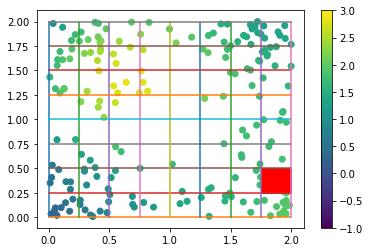

In [245]:
plt.scatter(data.x,data.y,c=data.z,vmin=-1,vmax=3)
for c in np.linspace(0,2,9):
    plt.plot([c,c],[0,2])
    plt.plot([0,2],[c,c])
# plt.Rectangle?
rect = plt.Rectangle(xy=[1.75,.25],width=.25,height=.25,color='red')
ax = plt.gca()
ax.add_patch(rect)
plt.colorbar();

In [246]:
### BEGIN SOLUTION
cond = (data.x > 1.75) & (data.x < 2) & (data.y > .25) & (data.y < .5)
num_points = len(data[cond])
### END SOLUTION
print(num_points)

9


In [247]:
"""Count the number of points in the specified square."""
### BEGIB HIDDEN TESTS
cond = (data.x > 1.75) & (data.x < 2) & (data.y > .25) & (data.y < .5)
assert num_points == len(data[cond]) 
### END HIDDEN TESTS

### Exercise

Now write a function that takes in:
  - a dataframe `data` (that you can assume has `x` and `y` columns)
  - real numbers `a`, `b`, `c`, `d`
  - positive integer `n`, the number of subintervals *per axis*:
  - integers `i` and `j` (each Between 1 and $n$ inclusive.
and returns a dataframe with just the rows of `data` whose $xy$-coordinates land strictly inside the subrectangle in the $i$th column (starting with $i=1$ on the left and $j=1$ on the bottom.

In [231]:
def filter_subrectangle(data,a,b,c,d,i,j,n):
    """return the rows in dataframe data in the 'ij'th subrectangle of an n-by-n 
    division of [a,b] x [c,d]"""
    ### BEGIN SOLUTION
    dx = (b-a)/n
    dy = (d-c)/n
    cond = (data.x > a + (i-1)*dx) & (data.x < a + i*dx) & (data.y > c + (j-1)*dy) & (data.y < c + j*dy)
    return data[cond]
    ### END SOLUTION

In [235]:
len(filter_subrectangle(data,0,2,0,2,2,2,3))

42

In [248]:
"""Check that your filter is working. """
assert len(filter_subrectangle(data,0,2,0,2,1,2,2)) == 52 # top-left quadrant of above example
assert len(filter_subrectangle(data,0,2,0,2,2,2,3)) == 3 # center square of tic-tac-toe grid
#### BEGIN HIDDEN TESTS
assert len(filter_subrectangle(data,0,2,0,2,2,3,13)) == 1
assert np.isclose(filter_subrectangle(data,0,2,0,2,2,3,13).sum(axis=1).values[0],1.2807580012024977)
### END HIDDEN TESTS

Pandas dataframes have a built-in method for choosing an element at random.

In [202]:
data.sample()

,x,y,z
107,1.875715,1.74271,1.430543


### Exercise

Using this and your `filter_subrenctangle` function above, Estimate the integral $$\int_0^2 \int_0^2 f(x,y)\,dx\,dy$$ using a $3\times 3$ grid. (You will likely getting  different answers when repeatedly running your code. 

In [253]:
### BEGIN SOLUTION
n = 3

dx = dy = 2/n 

tot = 0
for i in range(1,n+1):
    for j in range(1,n+1):
        df = filter_subrectangle(data,0,2,0,2,i,j,n)
        tot += df.sample()['z'].values[0]*dx*dy

print(f"The integral is approximately {tot}.")
### END SOLUTION

The integral is approximately 7.06192799051684.


Compare your estimate with the actual answer below. 

In [203]:
ans = dblquad(f,0,2,0,2)[0]
print(ans)

7.20717686010704


### Exercise

Determine the largest value $n$ for which every subrectangle has a least one entry and compute a Rieman i the same maer as above. 

In [275]:
@interact
def _(n=(1,10)):
    plt.scatter(data.x,data.y,c=data.z,vmin=-1,vmax=3)
    for c in np.linspace(0,2,n+1):
        plt.plot([c,c],[0,2],'k')
        plt.plot([0,2],[c,c],'k')
    plt.colorbar();

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

More specifically, write a function that takes in:
  - a dataframe `data` (that you can assume has `x` and `y` columns)
  - real numbers `a`, `b`, `c`, `d`
and returns an integer `n` such that a uniform partition of $[a,b]\times [c,d]$ into $n\times n$ subrectagles has at least one data point in each and an $(n+1)\times (n+1)$ partition would leave an empty subrectagle.

In [259]:
def finest_n(data,a,b,c,d):
    """return the integer n of the finest n x n partitio of the rectagle [a,b] x [c,d] 
    with no empty subrectagles"""
    ### BEGIN SOLUTION
    check = 1
    n = 1
    while check:
        dx = dy = 2/n 

        tot = 0
        for i in range(1,n+1):
            for j in range(1,n+1):
                df = filter_subrectangle(data,0,2,0,2,i,j,n)
                if len(df):
                    tot += df.sample()['z'].values[0]*dx*dy
                else:
                    check = 0
                    break;
        if check: 
            n += 1
        else:
            n -= 1
    return n 
print(f"The maximum partition is {finest_n(data,0,2,0,2)}.")
### END SOLUTION

The maximum partition is 4.


In [267]:
# Practice on this series set as well
np.random.seed(1415)
pts2 = (.55*np.random.randn(770,2) + np.array([[1.5,.5]])) % 2
data2 = pd.DataFrame(pts2,columns=['x','y'])
data2['z'] = f(data2.x,data2.y)
data2.head()

,x,y,z
0,1.248517,1.071467,2.138527
1,0.605309,0.907121,2.239352
2,1.729001,0.971249,1.744246
3,1.501194,0.484015,1.651379
4,1.726079,1.674936,1.535707


In [274]:
@interact
def _(n=(1,10)):
    plt.scatter(data2.x,data2.y,c=data2.z,vmin=-1,vmax=3)
    for c in np.linspace(0,2,n+1):
        plt.plot([c,c],[0,2],'k')
        plt.plot([0,2],[c,c],'k')
    plt.title("data2")
    plt.colorbar();

interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

In [269]:
finest_n(data2,0,2,0,2)

9

## Other Partitions (Optional)

A *partition* of an interval $[a,b]$ is a sequence of values $\{x_i\}_{i=0}^n$ such that 

$$a = x_0 < x_1 < x_2 < \cdots < x_n = b.$$

Thus far, we have been using *uniform* partitions so that the lengths of intervals are all

$$x_i - x_{i-1} = \Delta x_i = \frac{b-a}{n}$$

but there is no reason this has to be the case.

Thus a 1-D Riemann sum becomes

$$\int_a^b f(x) \,dx \approx \sum_{i=1}^n f(x_i^*)\,\Delta x_{i}.$$

### Example: Trapezoid Rule

We will estimate $$ \int_0^3 \left(1+ x - x^2 + \frac{x^3}{5} \right)\,dx $$

using non-uniform partitions of $[0,3]$.

In [124]:
def g(x): return 1 + x - x**2 + x**3/5

# Choose a nonuniform partition.
xs = np.array([0,1/2,3/4,3/2,2,3])

In [121]:
def trap_rule_nonuniform(xs,ys):
    """Compute the (signed) area under the polygonal path through (xs[i],ys[i])'s."""
    n = len(xs)
    return sum([(ys[i] + ys[i-1])/2 * (xs[i] - xs[i-1]) for i in range(1,n)])

In [119]:
def draw_traps(xs,f):
    """Plot the curve f over the interval partitioned by xs and draw the trapezoids."""
    x = np.linspace(xs[0],xs[-1],201)
    plt.plot(x,f(x),xs,f(xs),"k--");
    plt.scatter(xs,[0 for _ in range(len(xs))])
    plt.scatter(xs,f(xs))
    plt.fill_between(xs,f(xs),alpha=.3);
    for xi in xs:
        plt.plot([xi,xi],[0,f(xi)],'k--')
    plt.title(f"Area approx: {trap_rule_nonuniform(xs,f(xs)):.3f}");

Here is a brief demonstration of the above where the partition is picked randomly.

In [126]:
@interact
def _(n=(0,20)):
    xs = 3*np.random.rand(n)
    xs = np.append(xs,[0,3])
    xs.sort()
    draw_traps(xs,g);

interactive(children=(IntSlider(value=10, description='n', max=20), Output()), _dom_classes=('widget-interact'…

### Exercise

Rewrite the `midpoint_rule` for a double integral over a rectangle with partitions of $[a,b]$ and $[c,d]$ given by `xs` and `ys`, respectively.

In [53]:
def midpoint_rule_nu(f,xs,ys):
    '''An approximation of the integral of f over domain (a,b) x (c,d) 
    with partiions xs and ys and the midpoint as the sample point.'''
    ### BEGIN SOLUTION
    n,m = len(xs),len(ys)
    return sum([f((xs[i]+xs[i-1])/2,(ys[i]+ys[i-1])/2)*(xs[i]-xs[i-1])*(ys[i]-ys[i-1])
                for i in range(1,n) for j in range(1,m)])
    ### END SOLUTION

Now, we test it by approximating $$\int_0^1 \int_0^1 \left(x^2 + y^2 \right) \,dy\,dx.$$

**Quick Exercise**. What is the exact answer?

In [54]:
def p(x,y): return x**2 + y**2

xs = np.array([0,1/8,1/3,1/2,.55,.8,1])
ys = np.array([0,.1,.33,.45,.55,.7,.8,.92,1])
    
assert np.isclose(midpoint_rule_nu(p,xs,ys),0.5851056412037037)

0.5851056412037037

In [276]:
### BEGIN HIDE TESTS
np.random.seed(9)
x = np.random.rand(200)
x = np.append(x,[0,1])
y = np.random.rand(200)
y = np.append(y,[0,1])
x.sort()
y.sort()
x,y
assert np.isclose(midpoint_rule_nu(p,x,y),0.6676122013089623)
### END HIDE TESTS